数据分析、挖掘与建模工作主要包括数据获取、探索分析与可视化、数据预处理、数据建模和模型评估几部分
狭义的数据分析即指前两个部分，本文主要对数据进行狭义的数据分析，如果今后有时间，将继续后续的挖掘建模工作

### 1.导入数据并进行单因子探索分析

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

list1 = pd.read_csv("datalab/231715/listings.csv")    #读入数据
list1.shape    #查看有多少行数据，有多少特征


(28452, 16)

In [37]:
list1.head()    #查看数据前5行，大致了解数据类型

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


可以看出一共有28452行，16个属性，他们分别是id（短租房编号）、name（房源名称）、host_id（房东编号）、host_name(房东昵称)、neighbourhood_group（地区）、neighbourhood（地区）、latitude（经度）、longitude（纬度）、room_type（房间类型）、price（价格）、minimum_nights（最小天数）、number_of_reviews（评论数）、last_review（最近评论）、reviews_per_month（每月评论量）、calculated_host_listings_count（房东在租房屋数）、availability_365（一年中可用天数）。我们现在可以大致推断每个属性的数据类型，并且根据常识可知有些属性隐藏着隐形条件。比如价格应该大于0，一般不超过4000元/晚；最小天数应该大于等于1，一般不超过180天；可用天数应该大于等于1，小于等于365。这些隐藏条件我们先在心里大概有个认知就好，后面再慢慢分析。
从前五行可以看出，neighbourhood_group的值有很多NaN，可能为异常属性。neighbourhood值有的带应为，有的不带英文，后面要调整为纯中文的。host_id和host_name有些重复，后面可以删去一个

In [38]:
list1.info() #查看个属性的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 16 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dt

neighbourhood_group列全部为NaN，我们后续直接删除。name列有一个NaN，这列对数据分析影响并不大，所以我们保留这一行。reviews_per_month和last_review也有一些NaN，我们后面再看是怎么回事。

结合常识，我们可以知道剩余15个属性分为以下四类：

int:id、host_id、price、minimum_nights、number_of_reviews、calculated_host_listings_count、availability_365

float:latitude、longitude、reviews_per_month

str:name、host_name、neighbourhood、room_type

data:last_review

先来解决一下reviews_per_month和last_review存在NaN的问题

In [39]:
test1 = list1[list1["reviews_per_month"].isnull()]    #reviews_per_month为NaN的行
test2 = list1[list1["last_review"].isnull()]    #last_review为NaN的行
test1.shape



(11158, 16)

In [40]:
test1.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30,940126,The best place to live in Beijing!,4851361,Yan,NaN,顺义区 / Shunyi,40.10440,116.54955,Private room,617,1,0,NaN,NaN,2,365
68,1941773,"""Happy home"" hotel apartment fine decoration",9975678,怡家住宿,NaN,海淀区,39.97832,116.33714,Entire home/apt,349,1,0,NaN,NaN,3,360
76,2190095,2 bedrooms 2hall service Apartment,11169560,Chao,NaN,朝阳区 / Chaoyang,39.93023,116.51506,Entire home/apt,953,7,0,NaN,NaN,2,365
78,2414072,BEAUTIFUL NEW LUXURY LARGE 1 BR APT,12339716,Aaron,NaN,朝阳区 / Chaoyang,39.91859,116.46280,Entire home/apt,1074,1,0,NaN,NaN,1,365
91,2889922,东二环工体对面步行到三里屯5分钟,14770202,庆敏,NaN,朝阳区 / Chaoyang,39.93528,116.44525,Entire home/apt,980,1,0,NaN,NaN,41,364


In [41]:
test2.shape


(11158, 16)

In [42]:
test2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30,940126,The best place to live in Beijing!,4851361,Yan,NaN,顺义区 / Shunyi,40.10440,116.54955,Private room,617,1,0,NaN,NaN,2,365
68,1941773,"""Happy home"" hotel apartment fine decoration",9975678,怡家住宿,NaN,海淀区,39.97832,116.33714,Entire home/apt,349,1,0,NaN,NaN,3,360
76,2190095,2 bedrooms 2hall service Apartment,11169560,Chao,NaN,朝阳区 / Chaoyang,39.93023,116.51506,Entire home/apt,953,7,0,NaN,NaN,2,365
78,2414072,BEAUTIFUL NEW LUXURY LARGE 1 BR APT,12339716,Aaron,NaN,朝阳区 / Chaoyang,39.91859,116.46280,Entire home/apt,1074,1,0,NaN,NaN,1,365
91,2889922,东二环工体对面步行到三里屯5分钟,14770202,庆敏,NaN,朝阳区 / Chaoyang,39.93528,116.44525,Entire home/apt,980,1,0,NaN,NaN,41,364


可以看出当reviews_per_month为NaN的时候，number_of_reviews均为0， last_review也为NaN。从常识出发，如果评论数为0，那自然没有每月平均评论数，也没有最后一条评论的日期，是不是这个原因造成的reviews_per_month和last_review出现NaN呢，我们可以来验证一下。

In [43]:
test1 = list1[((list1["last_review"].isnull()) | (list1["reviews_per_month"].isnull())) & (list1["number_of_reviews"] == 0)]    #reviews_per_month和last_review为NaN，且number_of_reviews为0的行
test1.shape

(11158, 16)

输出的行数与刚刚输出的行数一致，可以说明我们之前的假设成立。所以我们保留reviews_per_month和last_review为NaN的行，并且将reviews_per_month为NaN的换成0，整体去除last_review列（因为这列信息太少了，留着也分析不出来什么东西）
下面先删除之前说过需要删除的neighbourhood_group、host_id和last_review

In [44]:
list = list1.copy()    #备份原始数据，以防发生意外
list = list.drop("neighbourhood_group", axis=1)    #删除neighbourhood_group
list = list.drop("host_id", axis=1)    #删除host_id
list = list.drop("last_review", axis=1)    #删除last_review

改掉中英合璧的neighbourhood列

In [45]:
import re
list["neighbourhood"] = list["neighbourhood"].apply(lambda x: re.sub("\s+\S+\s+.*", "", x))    #用正则表达式替换

换掉有NaN的reviews_per_month列

In [46]:
list[list["reviews_per_month"].isnull()] = 0.00

继续分析其他列的合理性，先看看数据类型为int和float列的基本信息。

In [47]:
list.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.845200e+04,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000
mean,1.518652e+07,24.290728,70.772917,319.766624,1.277590,7.103156,0.802189,5.884999,129.626248
std,1.323579e+07,19.511993,56.848807,1183.659334,13.638454,16.815067,1.391023,15.669233,149.642741
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.909368e+07,39.890710,116.335615,188.000000,1.000000,1.000000,0.200000,1.000000,70.000000
75%,2.791437e+07,39.940202,116.448930,416.000000,1.000000,6.000000,1.000000,6.000000,327.250000
max,3.392587e+07,40.949660,117.488690,68983.000000,1125.000000,322.000000,20.000000,222.000000,365.000000


每行的意义从上至下分别为有效值数量、平均数、标准差、最小值、下四分位数、中位数、上四分位数、最大值。也可以用箱式图来预览数据，在此不演示了。

id、latitude、longitude列：有0值，需删除。

price列：最小值和下四分位数都是0，很不正常，需要删除这些价格为零的数据。中位数和上四分位数分别为188和416，但最大值却为68983，这个数字过大，后续我们也要重点关注一下。

minimum_nights列：最小值和下四分位数都是0，很不正常，需要删除这些价格为零的数据。最大值1125过大，后续重点关注。

calculated_host_listings_count列：在租数为0不正常，后续需要删除。

availability_365列：一年中可用天数为0是不可能的，所以后续需要删除这些值，最大值365，正常。

这些列最小值和下四分位均为0，可能是同一批无效数据。


先来处理id列，删除id为0的行

In [48]:
list = list[list["id"] != 0]    #保留id不为0的行
list.shape

(17294, 13)

仅剩17293行，看来无效数据还挺多的。我们看看这时的属性概况

In [49]:
list.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.729400e+04,17294.000000,17294.000000,17294.000000,17294.000000,17294.000000,17294.000000,17294.000000,17294.000000
mean,2.498479e+07,39.962981,116.435239,526.078409,2.101885,11.686076,1.319757,9.681971,213.260437
std,6.587884e+06,0.152098,0.169783,1482.062458,17.443989,20.288523,1.581243,19.161970,137.857558
min,4.405400e+04,39.455810,115.479390,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,2.099085e+07,39.897580,116.361782,228.000000,1.000000,2.000000,0.290000,2.000000,83.000000
50%,2.648056e+07,39.929975,116.428810,369.000000,1.000000,4.000000,0.800000,4.000000,181.000000
75%,3.019256e+07,39.980463,116.477887,530.000000,1.000000,13.000000,1.750000,10.000000,358.000000
max,3.392587e+07,40.949660,117.488690,68983.000000,1125.000000,322.000000,20.000000,222.000000,365.000000


果然跟刚刚比各列的最小值和下四分位数正常了不少，但是价格和一年中可用天数仍存在0，我们再删除一下

In [50]:
list = list[list["price"] != 0]    #保留价格不为0的行
list = list[list["availability_365"] != 0]    #保留一年中可用天数不为0的行
list.shape

(15804, 13)

又去掉了一千多行，下面我们关注一下偏大的值，先看price列，拿10000元以上的房屋观察一下。

In [51]:
list[list["price"] > 10000]

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1067,12689987.0,Artistic apartment with culture,晨斌,朝阳区,39.92300,116.57996,Entire home/apt,67104.0,1.0,2.0,0.06,2.0,365.0
1227,13418237.0,Great Wall Paradise Villa,Chris,怀柔区,40.46643,116.59467,Entire home/apt,10066.0,1.0,6.0,0.19,1.0,364.0
2012,15488817.0,Hotel apartment close to huge Mall,晨斌,朝阳区,39.91962,116.59173,Entire home/apt,63346.0,1.0,16.0,0.55,2.0,180.0
5167,20748712.0,大望路/九龙山大床房,洋,朝阳区,39.88798,116.47667,Entire home/apt,59997.0,1.0,1.0,0.05,3.0,91.0
6612,21942314.0,"【温馨小窝窝】近地铁一号线五棵松/万寿路,距离北京西站3站地,15分钟｡",Qing,海淀区,39.89523,116.28252,Shared room,59997.0,1.0,4.0,0.24,1.0,180.0
6631,21952658.0,【核桃树小院】-四九城儿老北京城中心的四合院 让您感受不同的老北京生活,耘,东城区,39.93781,116.40932,Private room,10797.0,1.0,3.0,0.18,5.0,359.0
7136,22457777.0,shannon的小屋,筱淋,朝阳区,39.92451,116.46530,Private room,30002.0,1.0,6.0,0.43,2.0,271.0
10170,24994830.0,良乡大学城两室温馨小屋,王,房山区,39.72157,116.15182,Entire home/apt,68828.0,1.0,1.0,0.15,1.0,181.0
13736,27639330.0,古北水镇首排观景小叠墅,Coco,密云县,40.64913,117.26936,Entire home/apt,19997.0,1.0,1.0,0.68,1.0,365.0
14697,28134193.0,"此房不能租,不要询问了",陈,海淀区,39.94947,116.36246,Entire home/apt,68983.0,1.0,1.0,0.14,1.0,90.0


条数不多，我们一一观察一下可以发现，大致可以分为3类，一类是一些异常房间（不出租了），id为28134193；一类是月租房在这里冒充短租房，id为12689987、15488817、20748712、21942314、24994830、27639330、28687383，剩下的就是真的贵，四合院包院。前两类我们进行删除处理。

In [52]:
list = list[list["id"] != 28134193]
list = list[list["id"] != 12689987]
list = list[list["id"] != 15488817]
list = list[list["id"] != 20748712]
list = list[list["id"] != 21942314]
list = list[list["id"] != 24994830]
list = list[list["id"] != 27639330]
list = list[list["id"] != 28687383]

照着这个思路我们逐步筛选一下价格在4000元以上的房屋

In [53]:
list[list["price"]>8000][list["price"]<=10000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
18,537674.0,Quadrangle Courtyard ( Siheyuan),Chen,西城区,39.92412,116.37063,Private room,8898.0,1.0,11.0,0.15,4.0,360.0
441,7640968.0,"虛度時光的好地方,盡情庸懶,盡情安寧⋯⋯",探幽•北京,朝阳区,39.91183,116.53948,Entire home/apt,8046.0,1.0,3.0,0.15,1.0,365.0
1359,13850837.0,"｢有院｣建筑师的整套四合院,容纳18-20人,高逼格主题Party､团建､婚房优选",我宅,东城区,39.94034,116.40154,Entire home/apt,8200.0,1.0,11.0,0.34,24.0,364.0
3317,18416481.0,"【特惠】北邮,北师大,政法,中央财经,北交大附近的学院派小区温馨二居特惠啦",村棉,海淀区,39.95799,116.35057,Entire home/apt,9998.0,69.0,14.0,0.65,1.0,91.0
4047,19394189.0,My house _is your house 6号线龙湖长楹天街地铁旁温馨宜家风格小屋期待...,婕,朝阳区,39.92212,116.59615,Entire home/apt,9998.0,1.0,1.0,0.05,3.0,365.0
4050,19406069.0,My house _is your house6号线龙湖常楹天街地铁旁距机场20分钟车程精致...,婕,朝阳区,39.92268,116.59617,Entire home/apt,9998.0,1.0,27.0,1.22,3.0,180.0
4486,19995460.0,"望京超近地铁房,精致小窝房东超好",Michelle,朝阳区,39.99283,116.45646,Private room,9998.0,1.0,2.0,0.16,1.0,365.0
5928,21420481.0,1市中心二环内邻北京站天安门故宫崇文门 欧式豪华酒店公寓四人套房,思晗 (Angela),朝阳区,39.89491,116.44172,Entire home/apt,9998.0,1.0,18.0,1.09,19.0,128.0
6416,21789026.0,4市中心近故宫国贸CBD百子湾大望路三里屯双井地铁口步行两分钟文艺小清新&简欧混搭温馨大两居高楼层,思晗 (Angela),朝阳区,39.89291,116.46153,Entire home/apt,9998.0,2.0,39.0,2.30,19.0,70.0
6650,21970439.0,2二环内市中心近故宫天安门北京站建国门前门崇文门天坛国贸高层欧式高配豪华酒店公寓四人套房,思晗 (Angela),朝阳区,39.89621,116.44522,Entire home/apt,9998.0,1.0,5.0,0.30,19.0,146.0


留下537674、13850837、28419644

In [54]:
list = list.drop(list[(list["price"]<10000) & (list["price"]>8000)&  (list["id"] !=537674) & (list["id"] != 13850837) & (list["id"] != 28419644)].index)

继续筛选价格在6000-8000之间的

In [55]:
list[list["price"]>6000][list["price"]<=8000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
739,10127776.0,隐世Hutel·扭院儿 - 北京前门大栅栏体验设计艺术感的扭动四合院(整院),王燕,东城区,39.89778,116.39267,Private room,6878.0,1.0,2.0,0.10,6.0,180.0
2005,15471895.0,四合雅舍,Shu,怀柔区,40.42579,116.62804,Entire home/apt,7999.0,1.0,6.0,0.20,9.0,351.0
2588,16783530.0,"｢我宅｣｢方塘｣建筑师的整套院容纳12-14人,高逼格主题Party､发布会､表演､求婚优选",我宅,东城区,39.93718,116.40851,Entire home/apt,6999.0,1.0,5.0,0.21,24.0,365.0
3083,17996036.0,"限时 Quadrang!雍和宫北新桥二环里老北京四合院,大宅门 同仁堂乐家老宅,400平米",Eva,东城区,39.93856,116.41951,Entire home/apt,6999.0,1.0,2.0,0.10,6.0,167.0
3486,18664270.0,清乐居,清乐居,平谷区,40.25804,117.25069,Entire home/apt,6502.0,1.0,2.0,0.09,1.0,356.0
3794,19089155.0,雁栖湖慕田峪长城不夜谷--整院出租,惠英,怀柔区,40.46369,116.60204,Entire home/apt,6798.0,1.0,1.0,0.05,9.0,226.0
8158,23507304.0,纯独栋&团建&聚会-拾光轰趴连锁2号店,雪亮,通州区,39.93522,116.66709,Entire home/apt,6979.0,1.0,1.0,1.00,3.0,362.0
8462,23818807.0,4月赏花平日特惠~山下小院儿红螺寺雁栖湖,向外民宿,怀柔区,40.36398,116.61752,Entire home/apt,6798.0,1.0,4.0,0.57,1.0,357.0
8848,24123795.0,12人闲菜村·熹泽民宿(顺义文化营店)—机场旁中式度假小院 烧烤 独院 聚会 团建,耀洋,顺义区,40.14518,116.56918,Entire home/apt,6878.0,1.0,1.0,0.27,4.0,181.0
9369,24475800.0,为人民服务,智,昌平区,40.18376,116.40537,Entire home/apt,6798.0,1.0,1.0,0.08,2.0,365.0


都是四合院之类的，没什么问题，我们继续往下筛选4000-6000之间的

In [56]:
list[list["price"]>4000][list["price"]<=6000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
368,6908156.0,YiYi Hutong Courtyard,Briana,东城区,39.94286,116.42252,Entire home/apt,4999.0,1.0,20.0,0.49,6.0,361.0
581,8730454.0,BEIJING IRIS HOUSE,Iris,丰台区,39.86690,116.41844,Entire home/apt,5818.0,1.0,3.0,0.13,15.0,358.0
1029,12459176.0,【BBK35】Entire Counrtyard Local's private house,Bbk35,东城区,39.93911,116.42090,Entire home/apt,5898.0,1.0,10.0,0.30,10.0,172.0
1226,13417965.0,Hutong Courtyard|Forbidden City|City center,Zhengfan,西城区,39.93991,116.38796,Entire home/apt,5999.0,1.0,42.0,1.28,4.0,356.0
1238,13469772.0,静园小院,露,昌平区,40.34205,116.19359,Entire home/apt,4503.0,1.0,1.0,0.04,1.0,359.0
1526,14301188.0,八达岭长城脚下明清式古宅四合院!,Jie,延庆县,40.36420,115.99757,Entire home/apt,4885.0,1.0,1.0,0.03,1.0,365.0
2308,16193579.0,"【自在场头】画家的居家四合院,红墙旁的美宿(近/西单/金融街)",倩,西城区,39.92578,116.35875,Entire home/apt,4999.0,1.0,1.0,0.04,11.0,181.0
2486,16538999.0,YiYi COURTYARD- Experience the Hutong Life,Shen,东城区,39.94212,116.41297,Entire home/apt,4999.0,1.0,17.0,0.61,7.0,358.0
3413,18551539.0,聚游记-集装箱主题团建聚会轰趴别墅,聚游记,大兴区,39.72807,116.32423,Entire home/apt,4503.0,3.0,4.0,0.35,7.0,365.0
3487,18666116.0,"朝阳公园东高品质明亮大两居,近工体三里屯",Dora'S Home,朝阳区,39.93411,116.49791,Entire home/apt,4436.0,1.0,9.0,0.39,1.0,91.0


删除id为18666116、24532598、28427345、31546929的房屋

In [57]:
list = list[list["id"] != 18666116]
list = list[list["id"] != 24532598]
list = list[list["id"] != 28427345]
list = list[list["id"] != 31546929]

至此价格过高的房屋我们就筛选完了，我们再来看看价格过低的房屋有哪些，先看一下50元以下的。

In [58]:
list[list["price"]<50]

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3723,19023315.0,Exotic,彬,密云县,40.65668,117.2639,Private room,47.0,1.0,2.0,0.1,8.0,176.0


这条记录name信息很少，房屋类型还标的是Private room，不太符合常理，所以我们进行删除处理

In [59]:
list = list.drop(list[list["price"]<50].index)
list.shape

(15774, 13)

至此我们已经处理完了price列，还剩余15774个数据，这个过程虽然比较繁琐，但是很有必要，任何数据预处理都要细致，因为这决定了后续建模评估效果的上限，下面我们继续处理minimum_nights列，这列最小值为1，是正常的，最大值为1125，不正常.一般短租不会超过半年吧（这个不太确定，这里姑且这么认为了），所以我们删除一下值大于等于180的行

In [60]:
list = list.drop(list[list["minimum_nights"]>=180].index)
list.shape

(15760, 13)

剩余15760条数据，下面我们处理availability_365列，这列最小值是0，不正常，且一个房屋如果一年中可用天数太少，也不是一个正常现象，所以我们直接删除可用天数小于等于10的房屋。

In [61]:
list = list.drop(list[list["availability_365"]<=10].index)
list.shape

(15586, 13)

至此我们已经筛选完了所有的数值型属性，如果有精力的小伙伴可以再筛选一下经度和纬度在不在北京，这里我就偷个懒啦，之后如果用到再筛选。非数值型属性还有neighbourhood和room_type没有筛选，在之后对单因子进行分析的时候我们率先分析这两个值，顺便剔除他们的异常值。那接下来就开始单因子分析了，我们来看看每列单独能传递给我们的信息。

neighbourhood列：

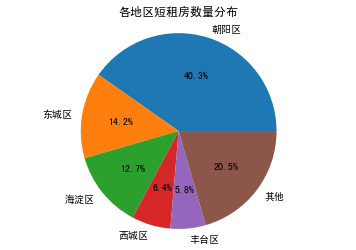

In [62]:
neighbourhood_values = list["neighbourhood"].value_counts().sort_values(ascending=False)    #统计neighbourhood列各值数量并排序
neighbourhood_other = neighbourhood_values.iloc[5:]
neighbourhood_values["其他"] = neighbourhood_other.sum()    #将排名前五之外的地区合并成其他
neighbourhood_values = neighbourhood_values.drop(neighbourhood_other.index)    
neighbourhood_labels = neighbourhood_values.index
plt.rcParams['font.sans-serif']=['SimHei']    #用来正常显示中文标签
plt.pie(neighbourhood_values, labels=neighbourhood_labels, autopct="%1.1f%%")
plt.title("各地区短租房数量分布")
plt.axis("equal")    #让饼图呈现正圆的形状
plt.show()

从图中我们可以看出房屋数量排名前5的区为：朝阳区，东城区，海淀区，西城区，丰台区。这五个区也都是北京的主城区，房屋数量占到了总体的80%左右。

room_type列：

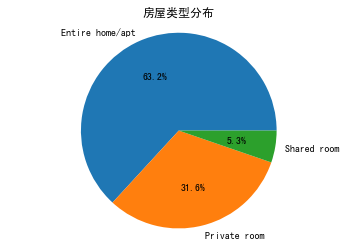

In [63]:
room_type_values = list["room_type"].value_counts()
room_type_label = room_type_values.index
plt.pie(room_type_values, labels=room_type_label, autopct="%1.1f%%")
plt.title("房屋类型分布")
plt.axis("equal")
plt.show()

从图中看出Entire home/apt（整套房间）比重较大，占到63.2%。Private room（独立房间）占比31.6%，排名第二。Shared room（合住房间）仅有5.3%。

price、number_of_reviews、calculated_host_listings_count、minimum_nights、availability_365列：

这些数值列我们主要看一下他们的平均值，中位数，四分位数，众数，偏态值和峰态值。

In [64]:
data = list[["price", "number_of_reviews", "calculated_host_listings_count", "minimum_nights", "availability_365"]]    #注意选择的列要先装到一个列表中
data.describe()    #平均值，中位数，四分位数等

,price,number_of_reviews,calculated_host_listings_count,minimum_nights,availability_365
count,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000
mean,499.004235,11.955922,10.324394,1.595406,235.931156
std,622.404060,20.672866,19.888915,4.030511,125.299340
min,54.000000,1.000000,1.000000,1.000000,11.000000
25%,235.000000,2.000000,2.000000,1.000000,90.000000
50%,389.000000,4.000000,5.000000,1.000000,280.000000
75%,542.250000,13.000000,11.000000,1.000000,359.000000
max,30002.000000,322.000000,222.000000,150.000000,365.000000


In [65]:
data.mode()    #众数

,price,number_of_reviews,calculated_host_listings_count,minimum_nights,availability_365
0,396.0,1.0,1.0,1.0,365.0


In [66]:
data.skew()    #偏态系数

price                             11.841420
number_of_reviews                  4.288746
calculated_host_listings_count     7.113358
minimum_nights                    17.154416
availability_365                  -0.280387
dtype: float64

In [67]:
data.kurt()    #峰态系数

price                             372.042682
number_of_reviews                  27.325830
calculated_host_listings_count     64.873135
minimum_nights                    422.992935
availability_365                   -1.625406
dtype: float64

price列：平均值499.004235元，中位数389元，下四分位数235元，上四分位数542.25元。众数396元。偏态系数较大说明存在一些过大的点，使均值大于中位数。峰态系数大说明数据非常集中，大部分价格还是在几百元的。

number_of_reviews列：平均值11.955922，中位数4，下四分位数2，上四分位数13。众数1。偏态系数较大说明有些十分受欢迎的房屋，使均值稍大于中位数。峰态系数较大说明数据较集中。

calculated_host_listings_count列：平均值10.324394，中位数5，下四分位数2，上四分位数11。众数1。偏态系数较大，说明有些人经营了不只一套房屋，可能有机构运营了大量的房屋。峰态系数较大说明数据较集中。

minimum_nights列：平均值1.595406，中位数1，下四分位数1，上四分位数1。众数1。说明大部分房屋可以只租1天，很符合短租的概念。偏态系数大，说明还是存在一些需要租很久的房屋，峰态系数大说明数据非常集中。

availability_365列：平均值235.931156，中位数280，下四分位数90，上四分位数359。众数365。偏态系数为负数但接近0，说明均值和中位数很接。峰态系数为负数说明数据比较分散。

### 2.多因子探索分析

多因子探索分析即分析多个属性之间的关系，我们重点关注各因素和价格之间的关系

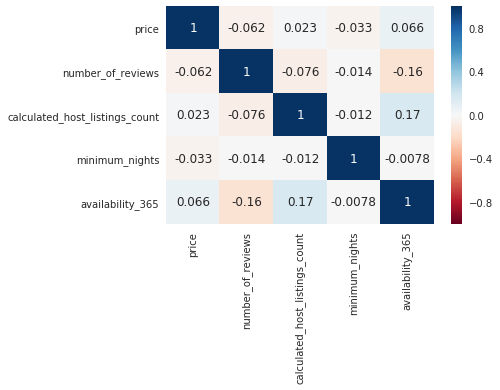

In [68]:
import seaborn as sns

sns.set()
ax = sns.heatmap(data.corr(), center=0, vmax=1, vmin=-1, cmap=sns.color_palette('RdBu', n_colors=128), annot=True)    #查看刚刚提到的五个属性之间的相关性，值越接近1表示正相关性越强，值越接近-1表示负相关性越强。
plt.show()

可以看出这四个属性均与价格相关性较低，其中一年中可用天数与评论数有轻微的负相关性，与经营房屋数有轻微的正相关性。不过这不是我们关注的重点，我们继续看一下其他属性与价格的关系。

先从行政区域与价格的关系入手

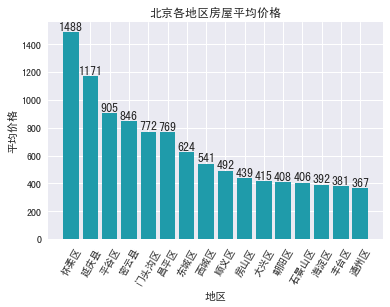

In [69]:
plt.rcParams['font.sans-serif']=['SimHei']    #用来正常显示中文标签
group_average_price = list.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
plot1 = plt.bar(group_average_price.index, group_average_price, color="#1f9baa")
plt.title("北京各地区房屋平均价格")
plt.xticks(rotation=60)
plt.ylabel("平均价格")
plt.xlabel("地区")
for a in plot1:
    h = a.get_height()
    plt.text(a.get_x()+a.get_width()/2, h, "%d"%int(h), ha="center", va="bottom")
plt.show()

可以看出短租房屋平均价格前五的区是怀柔区、延庆县、平谷区、密云县和门头沟区。这五个区都是北京的郊区，可能是因为当地的景点较多导致房屋价格较高。主城区中东城和西城区价格较高，可能因为这两个区位于北京城中心，胡同、四合院密集，且有天安门、故宫一类著名景点。为了验证我们的观点我们分析一下这几个地区的房屋名称。这里用到jieba库，但是jieba库只能做中文分词，无法做英文分词。鉴于这些房屋都位于中国境内，中文描述的较多，我们就忽略那些为数不多的英文描述啦。

In [70]:
from jieba import analyse

word_huairou = pd.Series(dtype=str)
word_yanqing = pd.Series(dtype=str)
word_pinggu = pd.Series(dtype=str)
word_miyun = pd.Series(dtype=str)
word_mentougou = pd.Series(dtype=str)
word_dongcheng = pd.Series(dtype=str)
word_xicheng = pd.Series(dtype=str)
word_daxing = pd.Series(dtype=str)
word_haidian = pd.Series(dtype=str)
for index in list.index:
    name = list.at[index, "name"]
    neighbourhood = list.at[index, "neighbourhood"]
    if name is not None:
        if neighbourhood == "怀柔区":
            word_huairou = word_huairou.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "延庆县":
            word_yanqing = word_yanqing.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "平谷区":
            word_pinggu = word_pinggu.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "密云县":
            word_miyun = word_miyun.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "门头沟区":
            word_mentougou = word_mentougou.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "东城区":
            word_dongcheng = word_dongcheng.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "西城区":
            word_xicheng = word_xicheng.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "大兴区":
            word_daxing = word_daxing.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif neighbourhood == "海淀区":
            word_haidian = word_haidian.append(pd.Series(analyse.extract_tags(name), dtype=str))
        else:
            pass
        
#先查看怀柔区出现频率前10的关键词
word_huairou.value_counts().head(10)


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.960 seconds.
Prefix dict has been built succesfully.


怀柔       65
长城       61
慕田峪长城    48
小院       44
民宿       42
雁栖湖      41
脚下       32
红螺寺      28
大床       23
北京       22
dtype: int64

可以看到有怀柔区有慕田峪长城、雁栖湖、红螺寺等著名自然景点，民宿、小院较多，所以房屋平均价格高。

再看看延庆县的。

In [71]:
word_yanqing.value_counts().head(10)

延庆       51
世园       50
民宿       45
八达岭长城    38
北京       31
脚下       27
长城       23
别墅       23
小院       22
原乡       20
dtype: int64

可以看出延庆县有世园会，还有八达岭长城，景点较为出名，房屋多为别墅、小院，民宿，所以价格较高。

再看看看平谷区的。

In [72]:
word_pinggu.value_counts().head(10)

平谷      14
金海湖     10
石林       8
民宿       8
北京       8
天云山      6
桃花       5
LOFT     5
时光       5
房车       4
dtype: int64

可以看出平谷区有金海湖、石林、天云山等等自然风光，但是知名度没有前两个区的景点高，房屋多为民宿，所以价格较高，但是没有前两个区高。

再来看看密云县。

In [73]:
word_miyun.value_counts().head(10)

古北       218
水镇       188
别墅        47
长城        41
民宿        33
司马台长城     31
度假        30
复式        29
密云        28
家庭        26
dtype: int64

密云县有古北水镇，司马台长城等景点，房屋多为民宿、别墅、复式楼，价格较高。而且可以看到关键词“度假”出现频率较高，可能相较于其他地区游客居住时间较长，所以房价相对而言没有前面地区的高。

再看看门头沟区。

In [74]:
word_mentougou.value_counts().head(10)

门头沟     23
公寓      13
S1       8
温馨       8
上岸       8
LOFT     8
京西       8
民宿       7
复式       7
地铁       7
dtype: int64

门头沟看起来没有什么著名景点，不过民宿、复式等词出现频率较高，且s1，地铁出现频率高。s1是北京首条中低速磁悬浮地铁。可能人们愿意前往交通便利的门头沟区疗养、放松。

我们再来看看房屋价格不高的北京郊区关键词。

In [75]:
word_daxing.value_counts().head(10)

地铁    190
北京     99
号线     89
亦庄     86
南站     77
公寓     65
温馨     65
直达     53
机场     48
南苑     44
dtype: int64

大兴区关键词相较于其他区而言，民宿、别墅、小院等词语出现频率并不高，机场相关词语出现频率较高，说明住户大多不是来度假的，而是来赶飞机顺便住一下的。这证实了我们之前的推测：房屋价格前五的区房屋价格高的原因是位于北京郊区，景点较多，人们愿意去游玩、放松。

我们再看看北京主城区中东城区和西城区价格偏高是不是符合我们的推测。

In [76]:
word_xicheng.value_counts().head(10)

天安门     279
地铁      265
故宫      224
北京      172
西单      165
金融街     152
儿童医院    141
北京西站    128
南锣鼓巷    126
号线      119
dtype: int64

北京西城区关键词中既有著名景点天安门、故宫、南锣鼓巷，又有大型购物中心西单，还有金融圣地金融街，以及北京著名的儿童医院。所以房屋需求较大，房屋价格自然稍高一些。

再看看东城区。

In [77]:
word_dongcheng.value_counts().head(10)

天安门     916
故宫      739
地铁      558
南锣鼓巷    525
王府井     509
胡同      358
北京      353
步行      352
雍和宫     306
前门      304
dtype: int64

东城区关键词中有著名景点天安门、故宫、南锣鼓巷、王府井、雍和宫、前门，而且胡同这个关键词也榜上有名。价格高也可以理解。

作为对比我们来看一下海淀区的关键词。

In [78]:
word_haidian.value_counts().head(10)

地铁      617
中关村     510
五道口     425
号线      370
颐和园     320
温馨      287
清华北大    229
医院      225
圆明园     214
10      201
dtype: int64

可以看出海淀区关键词中景点较少，仅有颐和园和圆明园，且都是公园形式的景点。更多关键词提到的是学校、医院、公司聚集处、小型购物中心。可能租户租住时间较长，价格也就相对实惠了。这证实了我们之前对于东城区、西城区房屋价格较高的推断。

为了更直观的观察房屋价格和地点的关系，我们借用高德地图API来爬取北京购物中心、特色商业街和世界遗产、国家级/省级风景名胜区的位置，之后与短租房一并做地图可视化。

In [79]:
import requests
import json
import csv

#为了不让这段代码运行，就注释掉了，自己实践的时候可以把这段代码换成你自己的key然后去除#。

# with open('jingdianshangchang.csv', 'w', newline='') as f:
#     write = csv.writer(f)
#     write.writerow(["name", "type", "location"])
#     dic = ["060101", "061000", "110201", "110202", "110203"]
#     for i in dic:
#         for page in range(1, 101):
#             response = requests.get("https://restapi.amap.com/v3/place/text?key=你的key&types=" + i + "&city=北京&citylimit=True&children=1&offset=20&extensions=base&extensions=XML&page=" + str(page))    #为了保护隐私，我将链接里我个人的key隐藏了，爬取好的文件直接上传上来了，小伙伴们换成自己的key就可以正常爬取哦
#             data = json.loads(response.text)["pois"]
#             print(i, page)
#             for m in data:
#                 write.writerow([m["name"], m["type"], m["location"]]) 


In [80]:
sc_and_ss = pd.read_csv("datalab/73138/jingdianshangchang.csv", encoding='gb18030')
sc_and_ss.head()

,name,type,location
0,世贸天阶北街,购物服务;商场;购物中心,"116.452101,39.916987"
1,龙湖长楹天街购物中心,购物服务;商场;购物中心,"116.599636,39.925029"
2,北京长安天街,购物服务;商场;购物中心,"116.123112,39.905953"
3,悦荟万科广场,购物服务;商场;购物中心,"116.239161,40.212115"
4,星东天地生活购物广场,购物服务;商场;购物中心,"116.651469,40.323978"


保存下来的数据就是上面这个样子。接下来我们做一个地图可视化，这里可以采用的库有很多，如：pyecharts、plotly、folium、bokeh、basemap、geopandas，我看到已经有同学用过geopandas了，这里我就使用folium了，其他的库如果有同学想看今后再补。

In [81]:
!pip install -i "https://mirrors.aliyun.com/pypi/simple/" folium

In [82]:
import folium
import folium.plugins
import webbrowser


# 创建地图底图
beijing = folium.Map(location=[40.3, 116.40], 
                     zoom_start=8.4, 
                     tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
                     attr="&copy; <a href=\"http://ditu.amap.com/\">高德地图</a>")
folium.GeoJson(open("datalab/231715/neighbourhoods.geojson", 'r', encoding='UTF-8').read(), name='geojson').add_to(beijing)
M = folium.FeatureGroup(name="Marker").add_to(beijing)
H = folium.FeatureGroup(name="Hot").add_to(beijing)
Marker = folium.plugins.MarkerCluster().add_to(M)

# 标记短租房
for i, row in list.iterrows():
    if row["price"] < 1000:
        color = 'green'
    elif 1000 <= row["price"] < 2000:
        color = 'yellow'
    else:
        color = 'red'
    folium.Circle((float(row["latitude"]), float(row["longitude"])), radius=10,
                  color=color).add_to(M)
    
# 标记景点和购物中心
for i, row in sc_and_ss.iterrows():
    lat = float(row["location"].split(',')[1])
    lon = float(row["location"].split(',')[0])
    folium.Marker(location=(lat, lon)).add_to(M)
    
# 画房屋分布热力图
lat_and_lon = [[list.iloc[i]["latitude"], list.iloc[i]["longitude"]] for i in range(list.shape[0])]
folium.plugins.HeatMap(lat_and_lon).add_to(H)
beijing.save("/home/tianchi/myspace/beijing.html")

如果使用Jupyter Notebook，可以直接输入beijing，在此页面看到交互式地图，只可惜天池notebook开发还不完善，无法显示，之后我会发邮件反映这个问题。同学们可以复制这段代码到自己电脑上试试效果，非常好看。

在这里就只能用截图大概分析一下了。

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279553358/1596114155802_vBiLQd3ROP.jpg)

图中带有数字的圆圈和蓝色标志均表示景点和购物中心，距离近的合并成了带有数字得圆圈，圆圈中得数字是附近该类标记得数量。绿点代表价格低于1000得房屋，黄点代表价格大于等于1000，小于2000得房屋，红点代表价格2000以上得房屋。热力图代表房屋聚集情况，越接近红色代表越聚集。

我们可以看出在郊区的短租房分布与景点、购物中心有着很强的联系性，基本分布在其附近，且红色和黄色点比例明显大于主城区中红色、黄色点比例。主城区房屋较为密集，我们放大这块来看看。

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279553358/1596114499482_BbQAfjsyTO.jpg)



主城区房屋没有全部分布在景点和购物中心附近，但是景点和购物中心附近点密度更大一些。图中深蓝色圈出的位置景点和购物中心较其他地区更为稠密，房屋密度也明显大于其他地方，黄色和红色点数量也明显大于其他地方。说明房屋价格和房屋附近的景点、购物中心数量和距离确实有一定关系。

除了房屋的地理位置与价格有关，房屋的类型也可能与价格相关，先来宏观看看各类型房屋的均价。

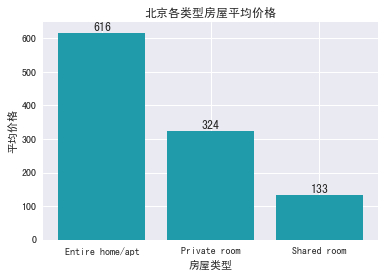

In [83]:
type_average_price = list.groupby("room_type")["price"].mean().sort_values(ascending=False)
plot1 = plt.bar(type_average_price.index, type_average_price, color="#1f9baa")
plt.title("北京各类型房屋平均价格")
plt.ylabel("平均价格")
plt.xlabel("房屋类型")
for a in plot1:
    h = a.get_height()
    plt.text(a.get_x()+a.get_width()/2, h, "%d"%int(h), ha="center", va="bottom")
plt.show()


其中Entire home/apt均价最高，为616元；Private room价格适中，为324元；Shared room价格最低，仅133元。我们制作一张价格和房屋类型的透视表，看一下三种房屋类型价格的平均值、中位数等基本情况

In [84]:
type_price = list.pivot_table(index='id', columns='room_type', values='price')
type_price.describe()

room_type,Entire home/apt,Private room,Shared room
count,9844.000000,4920.000000,822.000000
mean,616.800589,324.338415,133.759124
std,617.358508,616.929750,145.621221
min,54.000000,67.000000,60.000000
25%,356.000000,168.000000,87.000000
50%,470.000000,228.000000,101.000000
75%,597.000000,302.000000,141.000000
max,10066.000000,30002.000000,2979.000000


可以看出Entire home/apt类型房屋价格和Private room房屋价格的标准差都较大，且最大、最小值差距较大，Private room的最大值甚至超过Entire home/apt。但是从上四分位数、中值、下四分位可以看出大部分的房屋价格确实遵循着Entire home/apt房屋价格最高，Private room房屋价格适中，Shared room房屋价格最低.

我们可以再看一下各地区的房屋类型占比，并将地区和房屋类型两个因素结合一下分析房屋价格。

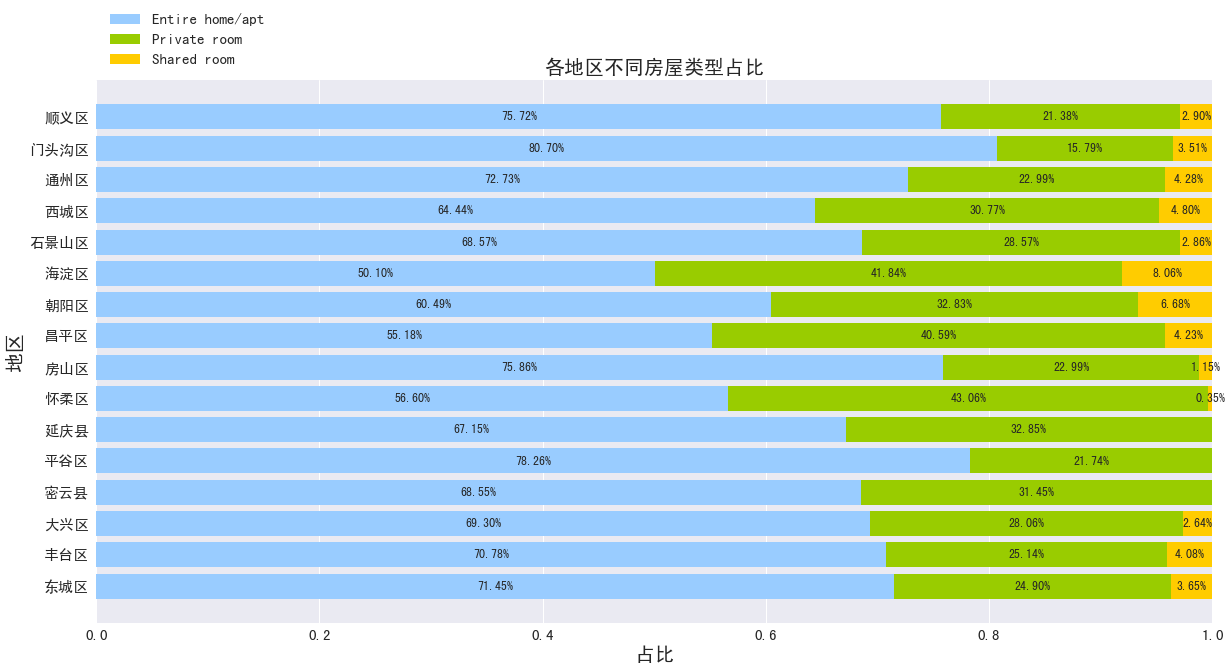

In [85]:
type_percent = list.pivot_table(index='neighbourhood', columns='room_type', values="id", aggfunc="count")
type_percent = type_percent.fillna(value=0)
fig, ax = plt.subplots(figsize=(20, 10))
bottom1 = type_percent["Entire home/apt"]/type_percent.sum(axis=1)
bottom2 = (type_percent["Entire home/apt"]+type_percent["Private room"])/type_percent.sum(axis=1)

# bar和barh均是画柱状图，不过barh画的是水平柱状图
bar11 = ax.barh(type_percent.index, type_percent["Entire home/apt"]/type_percent.sum(axis=1), color="#99CCFF")
bar22 = ax.barh(type_percent.index, type_percent["Private room"]/type_percent.sum(axis=1), left=bottom1.values, color="#99CC00")
bar33 = ax.barh(type_percent.index, type_percent["Shared room"]/type_percent.sum(axis=1), left=bottom2.values, color="#FFCC00")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("地区", size=20)
ax.set_xlabel("占比", size=20)
ax.set_title("各地区不同房屋类型占比", fontdict={'size':20})
ax.legend(bbox_to_anchor=(0, 1), loc="lower left", labels=type_percent.columns.values.tolist(), fontsize=15)
ax.tick_params(labelsize=15)
for a in bar11:
    h = a.get_width()
    plt.text(h/2, a.get_y()+a.get_height()/2, "%1.2f%%"%(h*100), ha="center", va="center")
for num1, b in enumerate(bar22):
    h = b.get_width()
    plt.text(h/2+bottom1[num1], b.get_y()+b.get_height()/2, "%1.2f%%"%(h*100), ha="center", va="center")
for num2, c in enumerate(bar33):
    h = c.get_width()
    if h != 0:
        plt.text(h/2+bottom2[num2], c.get_y()+c.get_height()/2, "%1.2f%%"%(h*100), ha="center", va="center")
plt.show()

其中海淀区的Entire home/apt类型房屋最少，为50.10%，门头沟区最多，为80.70%，这与上述分析中门头沟区房屋价格较高的现象相符。

门头沟区的Private room类型房屋最少，为15.79%，怀柔区最多，为43.06%.

延庆区、平谷区、密云区的Shared room类型房屋最少，均为0，海淀区的最多，为8.06%，这与海淀区学校众多，有学生考研、各类国家考试期租房需求有关。

我们可以看出，Entire home/apt类型房屋占比最多的门头沟区房屋均价并不是最高的，是否与各地区不同房屋类型均价差异有关，我们来验证一下。


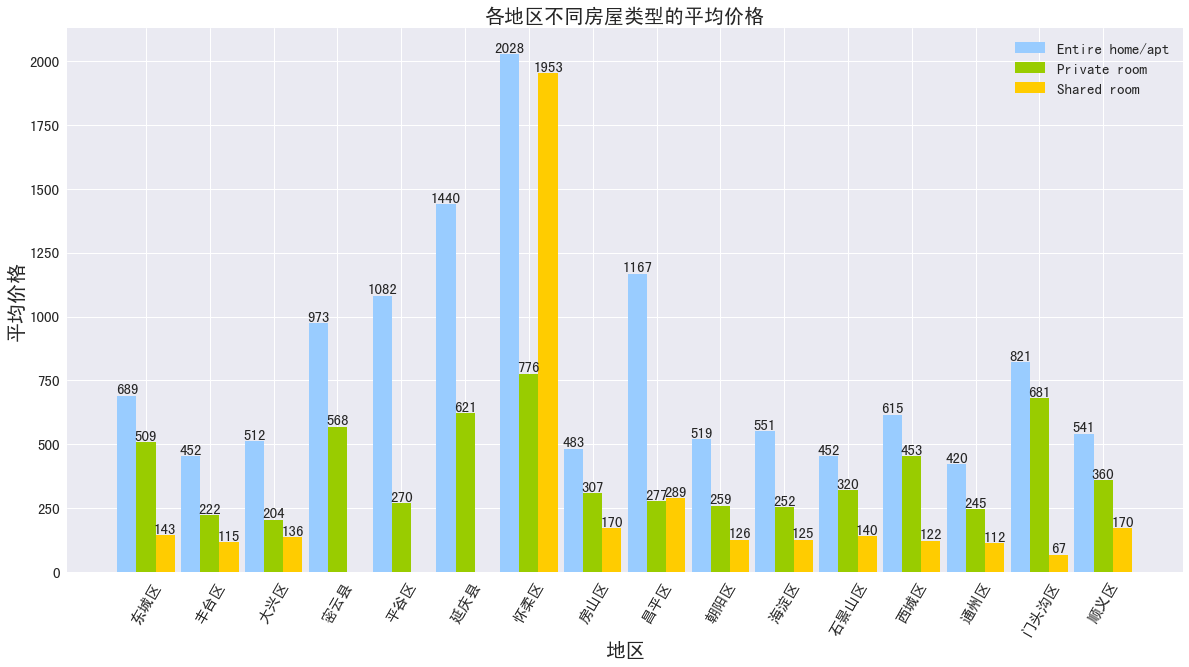

In [86]:
fig, ax = plt.subplots(figsize=(20, 10))
type_average_price1 = list.pivot_table(index='neighbourhood', columns='room_type', values='price')
x = np.arange(16)
# 分别绘制三种房屋类型的柱状图，柱子的中心错开0.3
bar1 = ax.bar(x-0.3, type_average_price1["Entire home/apt"], width=0.3, color="#99CCFF", label="Entire home/apt")
bar2 = ax.bar(x, type_average_price1["Private room"], width=0.3, color="#99CC00", label="Private room")
bar3 = ax.bar(x+0.3, type_average_price1["Shared room"], width=0.3, color="#FFCC00", label="Shared room")
plt.xticks(x, type_average_price1.index)
plt.xticks(rotation=60)
plt.tick_params(labelsize=15)
plt.xlabel("地区", size=20)
plt.ylabel("平均价格", size=20)
plt.legend(fontsize=15)
plt.title("各地区不同房屋类型的平均价格", fontdict={'size':20})
for a in bar1:
    h = a.get_height()
    plt.text(a.get_x()+a.get_width()/2, h, "%d"%int(h), ha="center", va="bottom", size=15)
for a in bar2:
    h = a.get_height()
    plt.text(a.get_x() + a.get_width() / 2, h, "%d" % int(h), ha="center", va="bottom", size=15)
for a in bar3:
    h = a.get_height()
    if h == h:
        plt.text(a.get_x()+a.get_width()/2, h, "%d"%int(h), ha="center", va="bottom", size=15)
plt.show()

可以看出不同地区不同房屋类型的均价差距巨大。我们以（Q2-（Q3-Q2）*1.5， Q3+（Q3-Q2）*1.5）作为正常值区间。

Entire home/apt类型：平谷、延庆、怀柔区、昌平区价格高出正常值。

Private room类型：东城区、密云县、延庆县、怀柔区、西城区、门头沟区价格高于正常值。

Shared room类型：怀柔区、昌平区价格高于正常值。

可能房东们对于这三种类型的房屋划分不明晰，我们来看看上述地区及房屋类型的关键词，了解三种房屋类型到底指什么。

In [87]:
word_E_high = pd.Series(dtype=str)
word_E_low = pd.Series(dtype=str)
word_P_high = pd.Series(dtype=str)
word_P_low = pd.Series(dtype=str)
word_S_high = pd.Series(dtype=str)
word_S_low = pd.Series(dtype=str)
for index in list.index:
    name = list.at[index, "name"]
    neighbourhood = list.at[index, "neighbourhood"]
    type = list.at[index, "room_type"]
    if name is not None:
        if type == "Entire home/apt":
            if neighbourhood in ["怀柔区", "平谷区", "延庆县", "昌平区"]:
                word_E_high = word_E_high.append(pd.Series(analyse.extract_tags(name), dtype=str))
            else:
                word_E_low = word_E_low.append(pd.Series(analyse.extract_tags(name), dtype=str))
        elif type == "Private room":
            if neighbourhood in ["怀柔区", "东城区", "延庆县", "门头沟区", "密云县", "西城区"]:
                word_P_high = word_P_high.append(pd.Series(analyse.extract_tags(name), dtype=str))
            else:
                word_P_low = word_P_low.append(pd.Series(analyse.extract_tags(name), dtype=str))
        else:
            if neighbourhood in ["怀柔区", "昌平区"]:
                word_S_high = word_S_high.append(pd.Series(analyse.extract_tags(name), dtype=str))
            else:
                word_S_low = word_S_low.append(pd.Series(analyse.extract_tags(name), dtype=str))
                
word_E_high.value_counts().head(20)

民宿       83
北京       80
别墅       76
地铁       60
长城       60
昌平       57
小院       56
怀柔       48
世园       45
延庆       43
温馨       41
公寓       41
聚会       39
脚下       31
慕田峪长城    31
八达岭长城    30
十三陵      28
烧烤       27
独立       25
雁栖湖      25
dtype: int64

可以看到这些高价地区将民宿、别墅、小院定义为Entire home/apt类型，所以此类型房屋价格偏高。

In [88]:
word_E_low.value_counts().head(20)

地铁      2893
天安门     1779
公寓      1301
号线      1275
国贸      1246
故宫      1170
北京      1093
三里屯     1057
温馨      1045
南锣鼓巷     762
CBD      714
王府井      682
地铁站      677
直达       668
步行       626
分钟       608
两居       575
舒适       570
南站       563
大床       498
dtype: int64

可以看到这些地区将公寓定义为Entire home/apt类型，所以此类型房屋价格偏低。

In [89]:
word_P_high.value_counts().head(20)

故宫      204
天安门     200
地铁      171
南锣鼓巷    163
四合院     154
北京      139
大床      132
王府井     107
鼓楼      103
温馨      101
胡同       99
雍和宫      87
独立       83
小院       79
前门       69
二环       68
什刹海      66
号线       63
房间       60
民宿       59
dtype: int64

可以看到这些地区将四合院列为了Private room类型，致使此类型房屋价格偏高。

In [90]:
word_P_low.value_counts().head(20)

地铁     1040
号线      556
温馨      533
国贸      508
三里屯     373
独立      367
地铁站     337
CBD     334
北京      309
大床      300
单间      259
公寓      257
舒适      254
分钟      253
阳光      249
附近      246
10      235
五道口     232
卧室      232
望京      230
dtype: int64

可以看到这些地区将大床房、单间、公寓列为了Private room类型，致使此类型房屋价格偏低。

In [91]:
word_S_high.value_counts().head(20)

地铁      8
天通苑     5
西二旗     4
舒适      4
温馨      4
百度      3
直达      3
腾讯      2
通透      2
大主卧     2
附近      2
网易      2
合住      2
安静      2
交通      2
生命科学    2
地铁站     2
床位      2
阳光      2
别墅      2
dtype: int64

可以看到这些地区有别墅这个关键词，可能是有合住别墅的现象。致使Shared room类型房屋价格偏高。

In [92]:
word_S_low.value_counts().head(20)

床位      205
地铁      178
女生      159
人间      118
国贸      114
号线      109
地铁站     105
温馨       79
北京       79
三里屯      74
公寓       71
舒适       68
青年       64
南锣鼓巷     62
CBD      59
望京       59
10       57
分钟       56
天安门      55
客厅       53
dtype: int64

可以看到这些地区的Shared room类型就是公寓中的床位，几人一间的那种，所以此类型房屋价格偏低。

分析至此也不能说各位房东分类错误，只能说明同种类型房屋也是千差万别，可能是小小的公寓，也可能是大大的别墅，造成了各地区同类型房屋价格偏差大。

至此，与价格有关的因素我们就分析完。下面我们再简要分析一个小点：受欢迎的房屋位于什么位置，价格跟当地均价的关系。


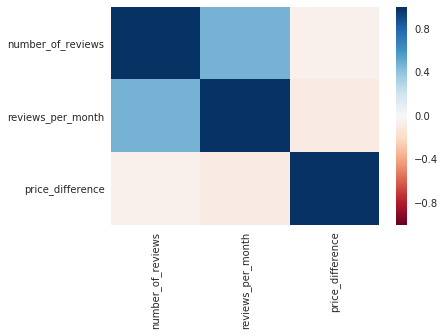

In [93]:
# 查看房屋总评论数、每月评论数与房屋价格与本区域同类型房屋均价的差距的相关性

list["price_difference"] = ''
for i, row in list.iterrows():
    neighbourhood = row["neighbourhood"]
    type = row["room_type"]
    mean_price = type_average_price1.at[neighbourhood, type]
    list.at[i, "price_difference"] = row["price"] - mean_price
list["price_difference"] = list["price_difference"].astype(float)
popular = list[["number_of_reviews", "reviews_per_month", "price_difference"]]
sns.set()
ax = sns.heatmap(popular.corr(), center=0, vmax=1, vmin=-1, cmap=sns.color_palette('RdBu', n_colors=128))
plt.show()

可以看出相关性很小，所以不是想象中的越便宜住的人越多。

In [94]:
list[["number_of_reviews", "reviews_per_month"]].quantile(q=0.75)

number_of_reviews    13.0000
reviews_per_month     1.8675
Name: 0.75, dtype: float64

计算number_of_reviews, reviews_per_month两列的上四分位数，并把评论数或每月评论数大于上四分位值的房屋列为受欢迎房屋，来看看此类房屋的分布。

In [96]:
# 筛选符合条件的房屋
list2 = list[(list["number_of_reviews"] > 13) | (list["reviews_per_month"] > 1.8675)]

# 创建地图底图
review = folium.Map(location=[40.3, 116.40],
                    zoom_start=8.5,
                    tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
                    attr="&copy; <a href=\"http://ditu.amap.com/\">高德地图</a>")
folium.GeoJson(open("datalab/231715/neighbourhoods.geojson", 'r', encoding='UTF-8').read(), name='geojson').add_to(review)
review_M = folium.FeatureGroup(name="Marker").add_to(review)
review_H = folium.FeatureGroup(name="Hot").add_to(review)
review_Marker = folium.plugins.MarkerCluster().add_to(review_M)

# 标记受欢迎房屋
for i, row in list2.iterrows():
    if row["price"] < 1000:
        color = 'green'
    elif 1000 <= row["price"] < 2000:
        color = 'yellow'
    else:
        color = 'red'
    folium.Circle((float(row["latitude"]), float(row["longitude"])), radius=10, color=color).add_to(review_M)

# 标记景点和购物中心
for i, row in sc_and_ss.iterrows():
    lat = float(row["location"].split(',')[1])
    lon = float(row["location"].split(',')[0])
    folium.Marker(location=(lat, lon)).add_to(review_Marker)

# 画房屋分布热力图
lat_and_lon = [[list.iloc[i]["latitude"], list.iloc[i]["longitude"]] for i in range(list.shape[0])]
folium.plugins.HeatMap(lat_and_lon).add_to(review_H)
review.save("/home/tianchi/myspace/review.html")

受欢迎房屋分布
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279553358/1596115359717_tYc3Zcm2b7.jpg)
所有房屋分布
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279553358/1596115368461_PZXi4qAPfJ.jpg)

与之前做的所有房屋的地图可视化对比，受欢迎房屋分布更加集中，向景点、购物中心和市区集中。

对于受欢迎房屋其实还有很多方面可以挖掘、分析。我就抛砖引玉一下啦~在实际应用中主要分析方面就看业务需求了。

如果今后有时间的话，会补上数据建模预测房屋价格的部分。（先自己挖个大坑）